# **GROUP 9**
## **1. Waqas Haaris Ali - 10947015**
## **2. Kobina Manso Baidoo - 10955922**


---



# **TASK 1: OVERVIEW, PREPROCESSING & VISUALIZATION TECHNIQUES**

---



# **Overview of Productivity Prediction of Garment Employees**

## **1. Industry Context**
- **Global Significance**: The garment industry is a prime example of industrial globalization in the modern era.
- **Labor-Intensive**: This industry relies heavily on manual processes and labor.
- **Demand and Performance**: Satisfying global demand for garment products is contingent on the production and delivery performance of employees.

## **2. Problem Statement**
- **Objective**: Predict the productivity range of garment employees to aid decision makers in the garment industry.
- **Purpose**: Enable tracking, analyzing, and predicting the productivity performance of working teams in factories.

## 3. **Dataset Characteristics**
- **Source**: Data collected manually and validated by industry experts.
- **Attributes**: Includes critical attributes of the garment manufacturing process and employee productivity.
- **Versatility**: Can be used for:
  - **Regression**: Predicting the productivity range (0-1).
  - **Classification**: Transforming the productivity range (0-1) into different classes.

## 4. **Importance for Decision Makers**
- **Productivity Tracking**: Helps in continuous monitoring of employee productivity.
- **Performance Analysis**: Facilitates a deeper understanding of factors affecting productivity.
- **Predictive Insights**: Supports proactive decision-making to optimize production processes and employee performance.


---




In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Read the dataset
data = pd.read_csv('garments_worker_productivity.csv')

# Displaying the number of rows and columns
print("(rows, columns) --> ", data.shape)

(rows, columns) -->  (1197, 15)


In [24]:
# Brief overview of the number and types of columns in the dataset
data.info()

# Describing the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [25]:
# Printing the first 5 rows of the dataset
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [26]:
# Correcting spelling error: changing 'sweing' to 'sewing' in the department column
data['department'] = data['department'].replace('sweing', 'sewing')
data['department'] = data['department'].replace('finishing ', 'finishing')





---


## **Step 1: Understanding the Dataset and Problem**

The dataset "Garments Worker Productivity" consists of 1197 entries and 15 columns. The ultimate goal is to predict the productivity range of garment employees, which can be approached as a regression problem where the target variable is the "actual_productivity" column.

#### Dataset Columns:
- **date**: Date of the observation.
- **quarter**: Which quarter of the year (e.g., Quarter1).
- **department**: Department of the employee (e.g., sewing, finishing).
- **day**: Day of the week.



- **team**: Team number.
- **targeted_productivity**: Targeted productivity set by the management.
- **smv**: Standard Minute Value, a predetermined time standard to complete a task.
- **wip**: Work in progress; the number of unfinished items.
- **over_time**: Amount of overtime in minutes.
- **incentive**: Incentives provided.
- **idle_time**: Idle time in minutes.
- **idle_men**: Number of idle men.
- **no_of_style_change**: Number of style changes in the factory.
- **no_of_workers**: Number of workers in a team.
- **actual_productivity: Actual productivity achieved (target variable).**


---





---


## **Step 2: Data Preprocessing Techniques**

**1. Handling Missing Values**

- Column **"wip" (Work in progress)** has missing values.
- Strategy: Impute missing values using the **mean (=1190.465991)** of the column.

**2. Converting Categorical Variables**

- Convert categorical variables **("date", "quarter", "department", "day")** into numerical format using one-hot encoding.
- The ***get_dummies*** function is used to convert categorical variables into a format that can be provided to machine learning algorithms to improve performance. This process is also known as **"one-hot encoding"**.


**3. Normalization/Standardization**

- Normalize features to ensure they are on the same scale, especially since columns like "over_time" and "incentive" have a wide range.
- **MinMaxScaler** is a tool used to scale and normalize the data to a given range, usually [0, 1].
-The default range for the MinMaxScaler is [0, 1], but this can be customized by providing the **feature_range** parameter.
- **scaler.fit_transform():** This method first fits the MinMaxScaler to the data (calculates the minimum and maximum values for scaling) and then transforms the data accordingly.

**4. Outlier Detection and Treatment**

- Identify and treat outliers in numerical columns like over_time, incentive, idle_time, and idle_men (if necessary)


---



In [27]:
print(data.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [28]:
# 1. Handle Missing Values
data['wip'].fillna(data['wip'].mean(), inplace=True)

In [57]:

print(data.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [30]:
# Specify the expected categories for the 'quarter' column
quarter_categories = ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5']
department_categories = ['finishing', 'sewing']
day_categories = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Convert the relevant columns to categorical with specified categories
data['quarter'] = pd.Categorical(data['quarter'], categories=quarter_categories)
data['department'] = pd.Categorical(data['department'], categories=department_categories)
data['day'] = pd.Categorical(data['day'], categories=day_categories)

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=False)

# Check the columns to ensure all categories are included
print(data_encoded.columns)

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'date_1/1/2015', 'date_1/10/2015',
       'date_1/11/2015', 'date_1/12/2015', 'date_1/13/2015', 'date_1/14/2015',
       'date_1/15/2015', 'date_1/17/2015', 'date_1/18/2015', 'date_1/19/2015',
       'date_1/20/2015', 'date_1/21/2015', 'date_1/22/2015', 'date_1/24/2015',
       'date_1/25/2015', 'date_1/26/2015', 'date_1/27/2015', 'date_1/28/2015',
       'date_1/29/2015', 'date_1/3/2015', 'date_1/31/2015', 'date_1/4/2015',
       'date_1/5/2015', 'date_1/6/2015', 'date_1/7/2015', 'date_1/8/2015',
       'date_2/1/2015', 'date_2/10/2015', 'date_2/11/2015', 'date_2/12/2015',
       'date_2/14/2015', 'date_2/15/2015', 'date_2/16/2015', 'date_2/17/2015',
       'date_2/18/2015', 'date_2/19/2015', 'date_2/2/2015', 'date_2/22/2015',
       'date_2/23/2015', 'date_2/24/2015', 'date_2/25/2015', 'date_2/26/2015',
  

In [31]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [33]:
# Initialize the StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded.drop('actual_productivity', axis=1))

X = pd.DataFrame(scaled_features, columns=data_encoded.columns.drop('actual_productivity'))

y = data_encoded['actual_productivity']


In [34]:
#Columns scaled successfully
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [35]:
# finding non-zero instances (rows) in over_time
over_time_exists = len(data[data['over_time'] != 0])

if over_time_exists > 700:
  print("Overtime exists in", over_time_exists, "rows.")
  print("--> Overtime column does not have outliers")
  print()
else:
  print("Overtime exists in", over_time_exists, "rows.")
  print("Overtime exists in", over_time_exists, "rows.")
  print()

# Finding non-zero instances in incentive
incentive_exists = len(data[data['incentive']!= 0])

if incentive_exists > 700:
  print("Incentive exists in", incentive_exists, "rows.")
  print("--> Incentive column does not have outliers")
  print()
else:
  print("Incentive exists in", incentive_exists, "rows.")
  print("--> Incentive column might have outliers")
  print()

idle_time_exists = len(data[data['idle_time']!= 0])

if idle_time_exists > 700:
  print("Idle time exists in", idle_time_exists, "rows.")
  print("--> Idle time column does not have outliers")
  print()
else:
  print("Idle time exists in", idle_time_exists, "rows.")
  print("--> Idle time column might have outliers")
  print()

idle_men_exists = len(data[data['idle_men']!= 0])

if idle_men_exists > 700:
  print("Idle men exists in", idle_men_exists, "rows.")
  print("--> Idle men column does not have outliers")
  print()
else:
  print("Idle men exists in", idle_men_exists, "rows.")
  print("--> Idle men column might have outliers")
  print()

Overtime exists in 1166 rows.
--> Overtime column does not have outliers

Incentive exists in 593 rows.
--> Incentive column might have outliers

Idle time exists in 18 rows.
--> Idle time column might have outliers

Idle men exists in 18 rows.
--> Idle men column might have outliers



In [15]:
# Columns to check for outliers
columns_to_check = ['over_time', 'incentive', 'idle_time', 'idle_men']

for column in columns_to_check:
    # Calculate quartiles and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Print results
    print(f"Outliers in {column} column:", len(outliers))
    print()

Outliers in over_time column: 1

Outliers in incentive column: 11

Outliers in idle_time column: 18

Outliers in idle_men column: 18



## **Step 3: Visualizations & Plots**

---



### **1. BOX PLOT - Visualization for Checking Outliers**

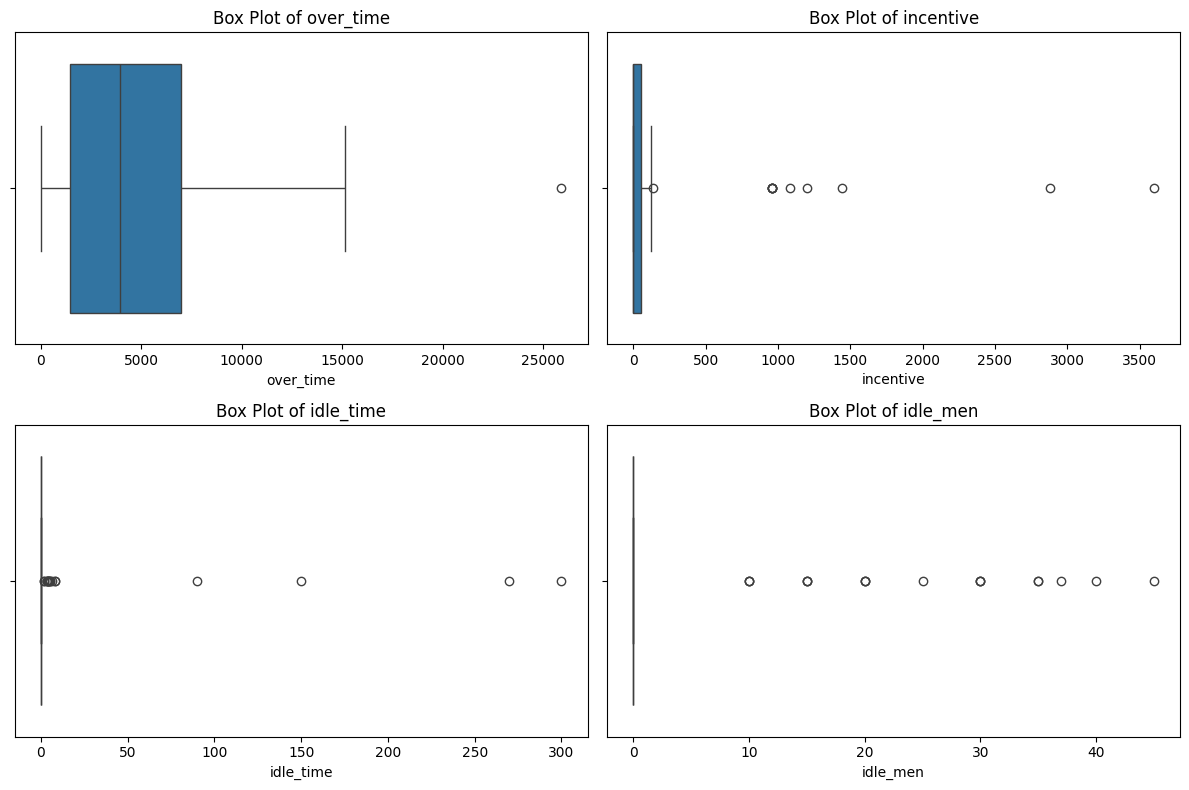

In [18]:
# 1. Box Plot -  Visualization for Checking Outliers

# Columns to visualize
columns_to_check = ['over_time', 'incentive', 'idle_time', 'idle_men']

# Box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


### **2. HISTOGRAMS**
#### Central Tendencies, Outlier Detection, Data Distribution

- **Over_time**: The values were usually in the 0.1 - 0.6 range.
- **Incentives**: These were often in the 0 - 0.1 range, indicating very low incentive amounts.
- **Idle_men**: The highest count was 1200, and the bar is primarily at 0, indicating that there were few instances where men were idle.
- **Idle_time**: The highest count was 1600, and the values were mostly 0, indicating that there were few instances of significant idle periods.
- **Standard Minute Value (SMV)**: The values were usually in the 0.0 - 0.6 range.
- **Number of Workers (no_of_workers)**: The values were usually in the 0.1 - 0.8 range, with the highest count being 350.

### **Contextual Insights**

- **Idle_men**: The highest count for `idle_men` was 1200, but the histogram shows a bar primarily at 0. This indicates that in most instances, there were no idle men. However, when there were idle men, the instances were counted in significant numbers.
- **Idle_time**: Similarly, while the highest count for `idle_time` was 1600, the values were mostly 0. This suggests that although idle time was generally low, when it did occur, it was recorded in large amounts.
- **Number of Workers**: The highest count for `no_of_workers` was 350, which is relatively moderate compared to `idle_men` and `idle_time`. This indicates a consistent number of workers with fewer fluctuations compared to idle metrics.

These observations suggest that idle times and idle men were generally infrequent, but when they did occur, they were substantial. The number of workers remained relatively stable with moderate variations.


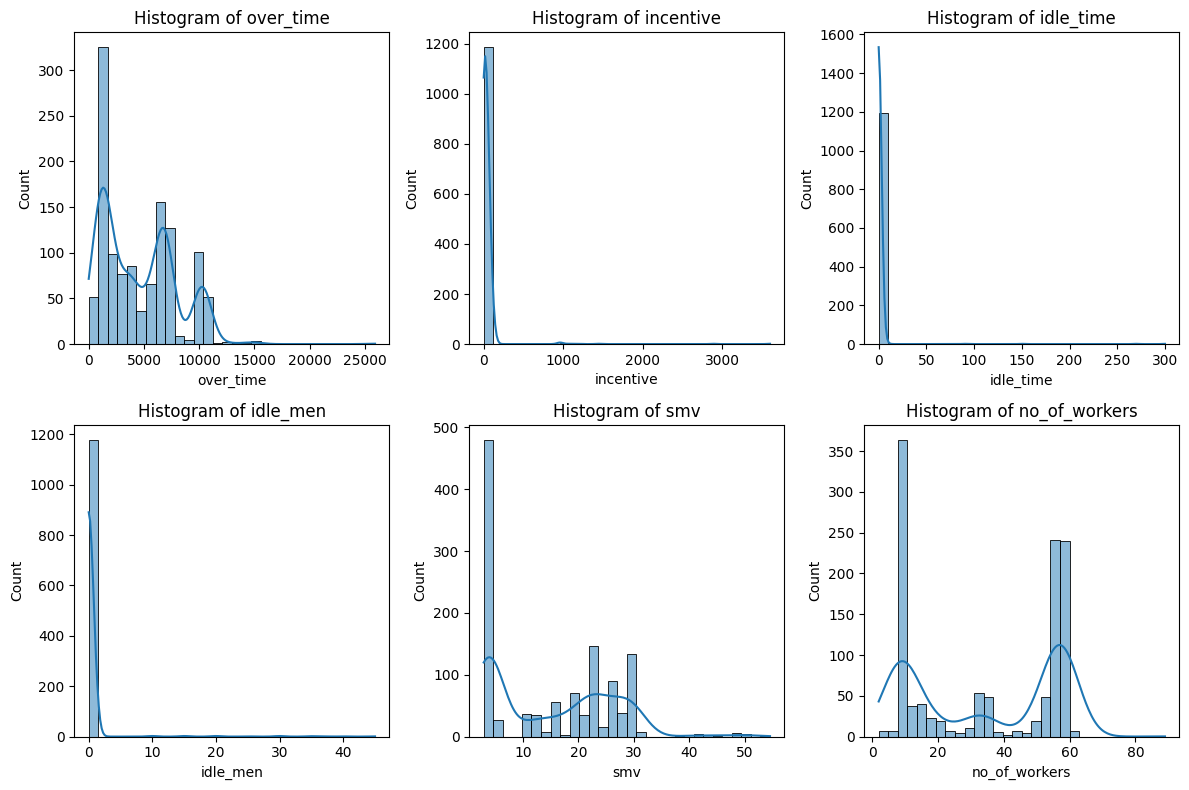

In [19]:
# 2. Histograms - Central Tendencies, Data Distribution
# Columns to visualize
columns_to_check = ['over_time', 'incentive', 'idle_time', 'idle_men', 'smv', 'no_of_workers']
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


### **3. CORRELATION HEATMAP**
### Correlation Among Various Columns

A correlation heatmap is a graphical representation of the relationships between different columns in the dataset. It helps to identify the strength and direction of correlations, which can provide insights into how different variables are related to each other.

#### Key Findings from the Correlation Heatmap:

- **Strong Positive Correlation**:
  - **Standard Minute Value (SMV)** and **Number of Workers (no_of_workers)**: Indicates that as the number of workers increases, the SMV tends to increase as well.
  
- **Considerable Positive Correlation**:
  - **Idle Men (idle_men)** and **Idle Time (idle_time)**: Suggests that more idle men are associated with longer idle times.
  
- **Weak Positive Correlation**:
  - **Targeted Productivity** and **Actual Productivity**: Implies that targeted productivity does not strongly predict actual productivity.
  
- **Very Weak Positive Correlation**:
  - **Incentive** and **Actual Productivity**: Indicates that incentives have a minimal effect on actual productivity.
  
- **Weak Negative Correlation**:
  - **Idle Men (idle_men)** and **Actual Productivity**: Suggests that higher idle men numbers are associated with lower actual productivity but the effect is minimal
  - **Standard Minute Value (SMV)** and **Actual Productivity**: Indicates that a higher SMV is associated with lower actual productivity but the effect is too minimal

### Conclusion

The correlation heatmap highlights significant relationships between various columns. Understanding these correlations is crucial for making data-driven decisions, as it allows us to identify key factors that influence productivity and areas where improvements can be made.


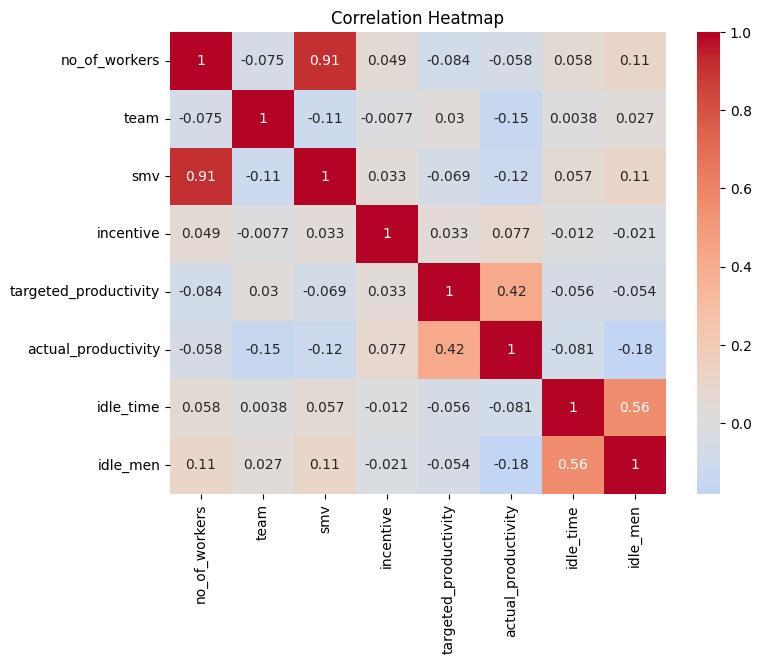

In [20]:
# 3. CORRELATION HEATMAP - Correlation among various columns

# Select the columns of interest
columns_to_check = ['no_of_workers','team','smv','incentive', 'targeted_productivity', 'actual_productivity', 'idle_time', 'idle_men']

# Calculate the correlation matrix for the selected columns
correlation_matrix = data[columns_to_check].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### **4. BAR PLOTS**

### Overview

A bar plot is a graphical representation used to compare the quantity of different categories. The length of each bar is proportional to the value it represents. Bar plots are effective for displaying and comparing the numerical values of categorical data.

In this analysis, bar plots are used to visualize the mean actual productivity across different categories: quarters, days of the week, and departments. This helps in identifying patterns and insights related to productivity variations.

**a. Productivity Analysis by Quarter**

The analysis of average actual productivity across different quarters reveals the following insights:

- **Highest Productivity**:
  - Quarter 1
  - Quarter 2
  - Quarter 4

- **Lowest Productivity**:
  - Quarter 5 (lowest)
  - Quarter 3

These findings indicate that the actual productivity was notably higher in Quarters 1, 2, and 4, while Quarter 5 had the lowest productivity, followed by Quarter 3.

**b. Productivity Analysis by Day of the Week**

The analysis of average actual productivity for each day of the week shows that:

- Average productivity was fairly high and constant for each day of the week.

**c. Productivity Analysis by Department**

The analysis of average actual productivity across different departments reveals that:

- The Sewing department was slightly more productive than the Finishing department.


<ipython-input-38-6444c79ce274>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarter', y='Mean_Actual_Productivity', data=mean_productivity_quarters_df, palette='cividis')
<ipython-input-38-6444c79ce274>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Mean_Actual_Productivity', data=mean_productivity_days_df, palette='magma')
<ipython-input-38-6444c79ce274>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Mean_Actual_Productivity', data=mean_productivity_departments_df, palette='dark')
<ipython-input

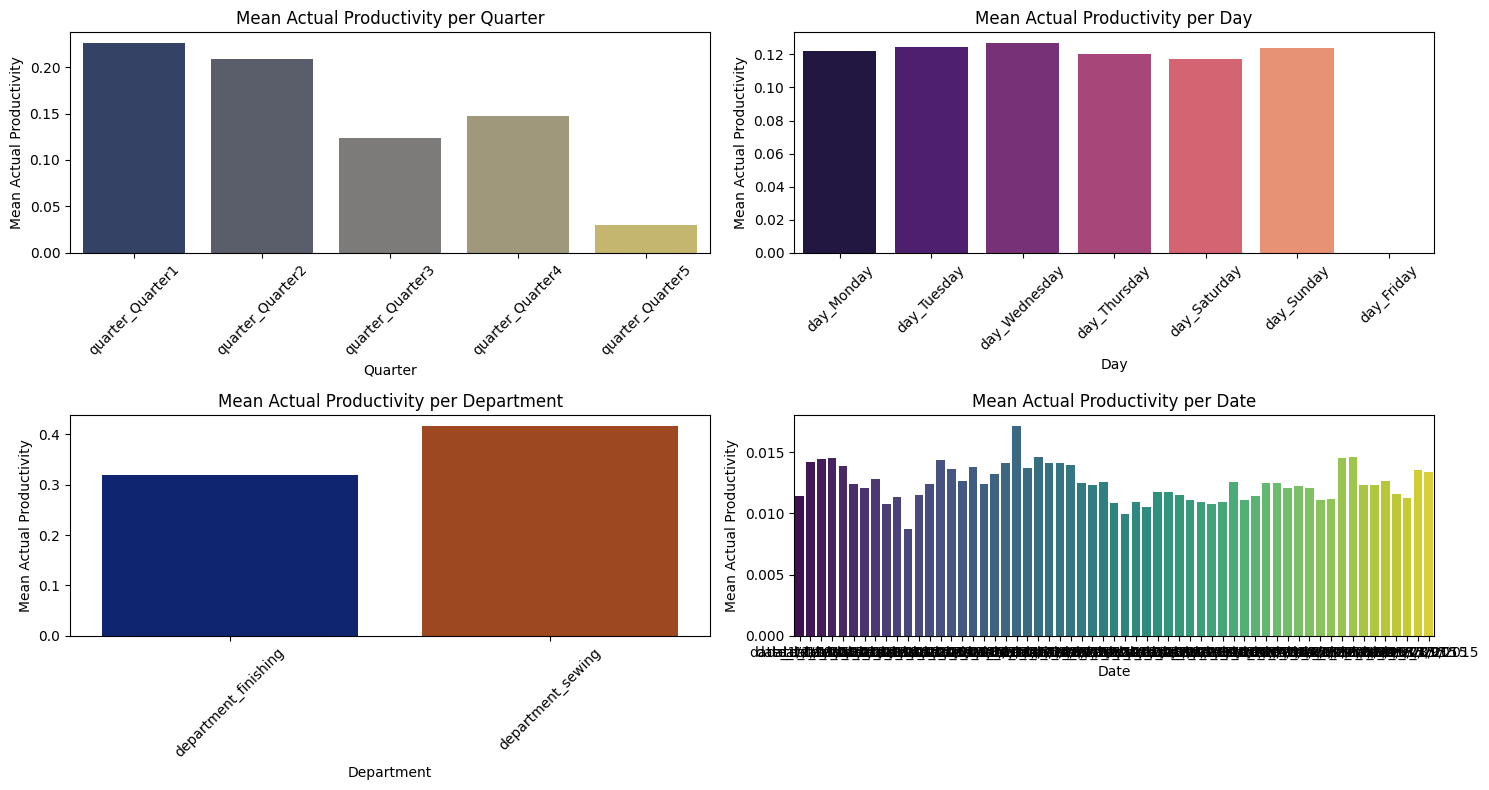

In [38]:
# Function to calculate mean productivity
def calculate_mean_productivity(data, categories, target_col):
    mean_productivity = {}
    for category in categories:
        mean_productivity[category] = (data_encoded[category] * data_encoded[target_col]).mean()
    return mean_productivity

# Quarters
quarters = ['quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5']
mean_productivity_quarters = calculate_mean_productivity(data, quarters, 'actual_productivity')
mean_productivity_quarters_df = pd.DataFrame(list(mean_productivity_quarters.items()), columns=['Quarter', 'Mean_Actual_Productivity'])

# Days
days = ['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday', 'day_Friday']
mean_productivity_days = calculate_mean_productivity(data, days, 'actual_productivity')
mean_productivity_days_df = pd.DataFrame(list(mean_productivity_days.items()), columns=['Day', 'Mean_Actual_Productivity'])

dates = ['date_1/1/2015', 'date_1/10/2015',
       'date_1/11/2015', 'date_1/12/2015', 'date_1/13/2015', 'date_1/14/2015',
       'date_1/15/2015', 'date_1/17/2015', 'date_1/18/2015', 'date_1/19/2015',
       'date_1/20/2015', 'date_1/21/2015', 'date_1/22/2015', 'date_1/24/2015',
       'date_1/25/2015', 'date_1/26/2015', 'date_1/27/2015', 'date_1/28/2015',
       'date_1/29/2015', 'date_1/3/2015', 'date_1/31/2015', 'date_1/4/2015',
       'date_1/5/2015', 'date_1/6/2015', 'date_1/7/2015', 'date_1/8/2015',
       'date_2/1/2015', 'date_2/10/2015', 'date_2/11/2015', 'date_2/12/2015',
       'date_2/14/2015', 'date_2/15/2015', 'date_2/16/2015', 'date_2/17/2015',
       'date_2/18/2015', 'date_2/19/2015', 'date_2/2/2015', 'date_2/22/2015',
       'date_2/23/2015', 'date_2/24/2015', 'date_2/25/2015', 'date_2/26/2015',
       'date_2/28/2015', 'date_2/3/2015', 'date_2/4/2015', 'date_2/5/2015',
       'date_2/7/2015', 'date_2/8/2015', 'date_2/9/2015', 'date_3/1/2015',
       'date_3/10/2015', 'date_3/11/2015', 'date_3/2/2015', 'date_3/3/2015',
       'date_3/4/2015', 'date_3/5/2015', 'date_3/7/2015', 'date_3/8/2015',
       'date_3/9/2015']
mean_productivity_dates = calculate_mean_productivity(data, dates, 'actual_productivity')
mean_productivity_dates_df = pd.DataFrame(list(mean_productivity_dates.items()), columns=['Date', 'Mean_Actual_Productivity'])

# Departments
departments = ['department_finishing', 'department_sewing']
mean_productivity_departments = calculate_mean_productivity(data, departments, 'actual_productivity')
mean_productivity_departments_df = pd.DataFrame(list(mean_productivity_departments.items()), columns=['Department', 'Mean_Actual_Productivity'])

# Plot the results in subplots
plt.figure(figsize=(15, 8))

# Quarter subplot
plt.subplot(2, 2, 1)
sns.barplot(x='Quarter', y='Mean_Actual_Productivity', data=mean_productivity_quarters_df, palette='cividis')
plt.title('Mean Actual Productivity per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Mean Actual Productivity')
plt.xticks(rotation=45)

# Day subplot
plt.subplot(2, 2, 2)
sns.barplot(x='Day', y='Mean_Actual_Productivity', data=mean_productivity_days_df, palette='magma')
plt.title('Mean Actual Productivity per Day')
plt.xlabel('Day')
plt.ylabel('Mean Actual Productivity')
plt.xticks(rotation=45)

# Department subplot
plt.subplot(2, 2, 3)
sns.barplot(x='Department', y='Mean_Actual_Productivity', data=mean_productivity_departments_df, palette='dark')
plt.title('Mean Actual Productivity per Department')
plt.xlabel('Department')
plt.ylabel('Mean Actual Productivity')
plt.xticks(rotation=45)

# Date subplot
plt.subplot(2, 2, 4)
sns.barplot(x='Date', y='Mean_Actual_Productivity', data=mean_productivity_dates_df, palette='viridis')
plt.title('Mean Actual Productivity per Date')
plt.xlabel('Date')
plt.ylabel('Mean Actual Productivity')

plt.tight_layout()
plt.show()


## **Scatter Plots and Correlations Analysis**

### 1. Targeted vs Actual Productivity

The scatter plot and correlation analysis between targeted productivity and actual productivity reveal a moderate positive relationship.

- **Correlation**: 0.422
  - The correlation coefficient of 0.422 indicates a moderate positive linear relationship between targeted and actual productivity.

- **Scatter Plot**:
  - The scatter plot shows a trend where higher targeted productivity tends to correspond to higher actual productivity. The regression line (in red) illustrates this positive trend, indicating that as targeted productivity increases, actual productivity also tends to increase.

### 2. SMV vs Number of Workers

Analyzing the relationship between SMV (Standard Minute Value) and the number of workers highlights a strong positive correlation.

- **Correlation**: 0.912
  - The high correlation coefficient of 0.912 indicates a strong positive linear relationship between SMV and the number of workers.

- **Scatter Plot**:
  - The scatter plot demonstrates a clear positive trend, where higher SMV values are associated with a greater number of workers. The regression line (in red) confirms this relationship, suggesting that as SMV increases, there tends to be an increase in the number of workers.

### 3. Idle Time vs Idle Men

Examining the correlation and scatter plot between idle time and idle men reveals a moderate positive relationship.

- **Correlation**: 0.559
  - The correlation coefficient of 0.559 indicates a moderate positive linear relationship between idle time and idle men.

- **Scatter Plot**:
  - The scatter plot shows a pattern where higher idle time often corresponds to higher idle men. The regression line (in red) illustrates this positive trend, suggesting that as idle time increases, there tends to be an increase in idle men.

### Conclusion

These scatter plots and correlation coefficients provide valuable insights into the relationships between different variables in the dataset. Understanding these relationships helps in identifying patterns, trends, and dependencies that can inform decision-making and operational strategies.


Correlation between Targeted Productivity and Actual Productivity: 0.422
Correlation between SMV and Number of Workers: 0.912
Correlation between Idle Time and Idle Men: 0.559


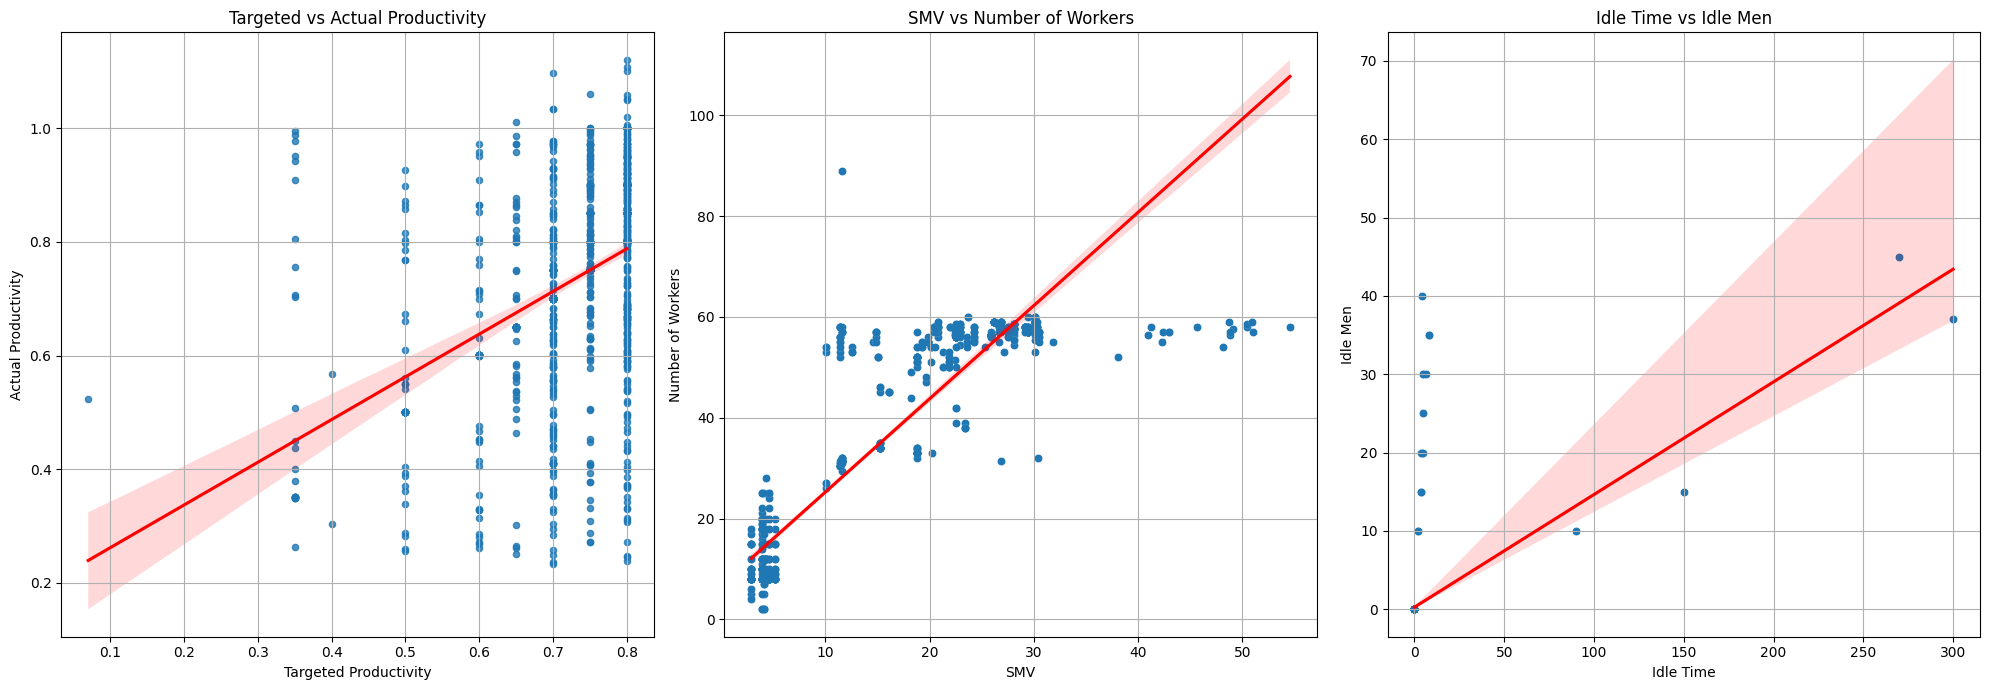

In [39]:
# Calculate the correlation and create scatter plot for Targeted vs Actual Productivity
correlation1 = data['targeted_productivity'].corr(data['actual_productivity'])
print(f'Correlation between Targeted Productivity and Actual Productivity: {correlation1:.3f}')

plt.figure(figsize=(20, 7))

# Subplot 1: Targeted vs Actual Productivity
plt.subplot(1, 3, 1)
sns.regplot(x='targeted_productivity', y='actual_productivity', data=data, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Targeted vs Actual Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.grid(True)

# Calculate the correlation and create scatter plot for SMV vs Number of Workers
correlation2 = data['smv'].corr(data['no_of_workers'])
print(f'Correlation between SMV and Number of Workers: {correlation2:.3f}')

# Subplot 2: SMV vs Number of Workers
plt.subplot(1, 3, 2)
sns.scatterplot(x='smv', y='no_of_workers', data=data)
sns.regplot(x='smv', y='no_of_workers', data=data, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('SMV vs Number of Workers')
plt.xlabel('SMV')
plt.ylabel('Number of Workers')
plt.grid(True)

# Calculate the correlation and create scatter plot for Idle Time vs Idle Men
correlation3 = data['idle_time'].corr(data['idle_men'])
print(f'Correlation between Idle Time and Idle Men: {correlation3:.3f}')

# Subplot 3: Idle Time vs Idle Men
plt.subplot(1, 3, 3)
sns.scatterplot(x='idle_time', y='idle_men', data=data)
sns.regplot(x='idle_time', y='idle_men', data=data, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Idle Time vs Idle Men')
plt.xlabel('Idle Time')
plt.ylabel('Idle Men')
plt.grid(True)

plt.tight_layout()
plt.show()


## **TRAINING AND TESTING 3 MODELS**




In [53]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **1. Random Forest Regressor**

* Reason: Random Forest is an ensemble method that combines multiple decision trees to improve predictive accuracy and control over-fitting. It handles non-linear relationships well and provides feature importance, which can be useful for understanding the impact of different features on productivity.


**Hyperparameters:**
- **n_estimators:** The number of trees in the forest. Default is 100.
- **max_depth:** The maximum depth of the tree. If None, nodes are expanded until all leaves contain less than `min_samples_split` samples.
- **min_samples_split:** The minimum number of samples required to split an internal node. Default is 2.
- **min_samples_leaf:** The minimum number of samples required to be at a leaf node. Default is 1.
- **max_features:** The number of features to consider when looking for the best split. Default is 'auto' (sqrt(n_features)).


In [54]:
import time
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_split=6,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)


start_time = time.time()
rf_model.fit(X_train, y_train)
training_duration_rf = time.time() - start_time


# Step 8: Evaluate the model
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


# Calculate performance metrics for Random Forest
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print Random Forest performance metrics
print('Random Forest Training Performance:')
print('MSE: {:.4f}'.format(mse_train_rf))
print('RMSE: {:.4f}'.format(rmse_train_rf))
print('MAE: {:.4f}'.format(mae_train_rf))

print('Random Forest Testing Performance:')
print('MSE: {:.4f}'.format(mse_test_rf))
print('RMSE: {:.4f}'.format(rmse_test_rf))
print('MAE: {:.4f}'.format(mae_test_rf))

print("Training Duration: ", training_duration_rf)

Random Forest Training Performance:
MSE: 0.0132
RMSE: 0.1149
MAE: 0.0803
Random Forest Testing Performance:
MSE: 0.0186
RMSE: 0.1362
MAE: 0.0932
Training Duration:  0.8868165016174316


## **Performance Analysis**

- The training performance metrics are quite good, indicating that the model is able to capture the patterns in the training data well.
- The testing performance metrics are slightly worse than the training metrics, which is expected due to generalization to unseen data. However, the difference is not significant, suggesting that the model is not overfitting.


---






# **2. Gradient Boosting Regressor**

* Reason: Gradient Boosting builds models sequentially to correct errors of the previous models. It's powerful for capturing complex patterns and interactions in the data, often resulting in high predictive performance. It also offers control over model complexity through hyperparameters like learning rate and number of estimators.

**Hyperparameters:**
- **n_estimators:** The number of boosting stages to be run. Default is 100.
- **learning_rate:** Shrinks the contribution of each tree by `learning_rate`. There is a trade-off between learning_rate and n_estimators. Default is 0.1.
- **max_depth:** The maximum depth of the individual regression estimators. Default is 3.
- **min_samples_split:** The minimum number of samples required to split an internal node. Default is 2.
- **min_samples_leaf:** The minimum number of samples required to be at a leaf node. Default is 1.
- **subsample:** The fraction of samples to be used for fitting the individual base learners. Default is 1.0.

In [52]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
start_time = time.time()
gb_model.fit(X_train, y_train)
training_duration_gb = time.time() - start_time



# Predict on training and testing sets
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics for Gradient Boosting
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mse_train_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)

mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)

# Print Gradient Boosting performance metrics
print('Gradient Boosting Training Performance:')
print('MSE: {:.4f}'.format(mse_train_gb))
print('RMSE: {:.4f}'.format(rmse_train_gb))
print('MAE: {:.4f}'.format(mae_train_gb))

print('Gradient Boosting Testing Performance:')
print('MSE: {:.4f}'.format(mse_test_gb))
print('RMSE: {:.4f}'.format(rmse_test_gb))
print('MAE: {:.4f}'.format(mae_test_gb))

print("Training Duration:", training_duration_gb)


Gradient Boosting Training Performance:
MSE: 0.0087
RMSE: 0.0930
MAE: 0.0614
Gradient Boosting Testing Performance:
MSE: 0.0174
RMSE: 0.1318
MAE: 0.0849
Training Duration: 0.7312965393066406


## **Performance Analysis**


- The training performance metrics are very good, with lower errors compared to Random Forest, indicating that the model captures the training data patterns exceptionally well.
- The testing performance metrics are also good and show slightly better results than Random Forest, suggesting that Gradient Boosting has a slight edge in predictive performance on this dataset.
- The smaller gap between training and testing performance indicates that the model generalizes well and is not overfitting.


---






# **3. Support Vector Regressor (SVR)**

* Reason: SVR uses the principles of Support Vector Machines for regression tasks. It works well for high-dimensional datasets and can model non-linear relationships using kernel functions. SVR is effective for datasets where the number of features is large compared to the number of observations.

**Hyperparameters:**
- **C:** Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. Default is 1.0.
- **epsilon:** Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated with training loss function. Default is 0.1.
- **kernel:** Specifies the kernel type to be used in the algorithm. Default is 'rbf' (Radial Basis Function).
- **gamma:** Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. Default is 'scale' (1 / (n_features * X.var())).

In [51]:
# Support Vector Regressor
svr_model = SVR()

start_time = time.time()
svr_model.fit(X_train, y_train)
training_duration_svr = time.time() - start_time

# Predict on training and testing sets
y_train_pred_svr = svr_model.predict(X_train)
y_test_pred_svr = svr_model.predict(X_test)

# Calculate performance metrics for SVR
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)

mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)

# Print SVR performance metrics
print('SVR Training Performance:')
print('MSE: {:.4f}'.format(mse_train_svr))
print('RMSE: {:.4f}'.format(rmse_train_svr))
print('MAE: {:.4f}'.format(mae_train_svr))

print('SVR Testing Performance:')
print('MSE: {:.4f}'.format(mse_test_svr))
print('RMSE: {:.4f}'.format(rmse_test_svr))
print('MAE: {:.4f}'.format(mae_test_svr))

print("Training Duration:", training_duration_svr)


SVR Training Performance:
MSE: 0.0135
RMSE: 0.1160
MAE: 0.0891
SVR Testing Performance:
MSE: 0.0263
RMSE: 0.1620
MAE: 0.1163
Training Duration: 0.058406829833984375


## **Performance Analysis**


- The training performance metrics are similar to Random Forest, indicating that SVR can also capture the training data patterns reasonably well.
- The testing performance metrics are worse than both Random Forest and Gradient Boosting, suggesting that SVR has a lower generalization performance on this dataset.
- The larger gap between training and testing performance indicates that SVR may be overfitting more compared to the other models.


---

## **Model Performance Comparison**

| Metric          | Random Forest Training | Random Forest Testing | Gradient Boosting Training | Gradient Boosting Testing | SVR Training | SVR Testing |
|-----------------|------------------------|-----------------------|----------------------------|---------------------------|--------------|-------------|
| **MSE**         | 0.0132                 | 0.0186                | 0.0087                     | 0.0174                    | 0.0135       | 0.0263      |
| **RMSE**        | 0.1149                 | 0.1362                | 0.0930                     | 0.1318                    | 0.1160       | 0.1620      |
| **MAE**         | 0.0803                 | 0.0932                | 0.0614                     | 0.0849                    | 0.0891       | 0.1163      |



# **CONCLUSION**



- **Gradient Boosting Regressor** shows the best overall performance, with the lowest errors on both the training and testing sets. This model captures complex patterns and generalizes well, making it the best choice for this dataset.
- **Random Forest Regressor** also performs well but is slightly less accurate than Gradient Boosting. It is still a strong candidate due to its robustness and simplicity.
- **Support Vector Regressor (SVR)** has the highest errors on the testing set, indicating that it may not be the best model for this dataset. It may benefit from further tuning or may not be suitable for this specific problem.


---



# **RECOMMENDATIONS**

- **Gradient Boosting Regressor** should be considered the primary model for predictions due to its superior performance.
- **Random Forest Regressor** can be used as a backup or in an ensemble approach to improve robustness.
- Further tuning and feature engineering could be performed on SVR if there is a specific need or interest in using this model.